In [1]:
import numpy as np
import matplotlib.pyplot as plt

import central_system as cs
import analyze_control as ac

# ダクト周囲温度

#### room 1

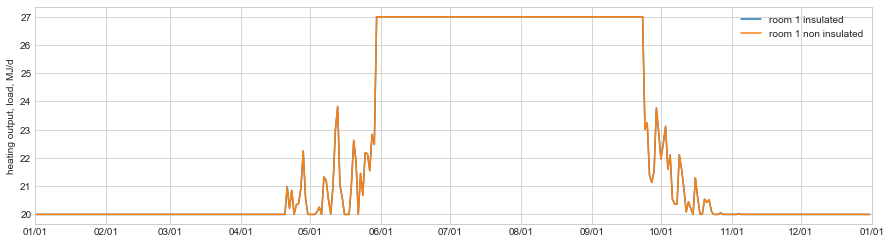

In [2]:
data = [
    (ac.get_main_value(6)['time_value']['duct_ambient_temperature_room1'], 'room 1 insulated'),
    (ac.get_main_value(52)['time_value']['duct_ambient_temperature_room1'], 'room 1 non insulated'),
]

ac.draw_graph('heating output, load, MJ/d', data, op='ave')

#### room 2

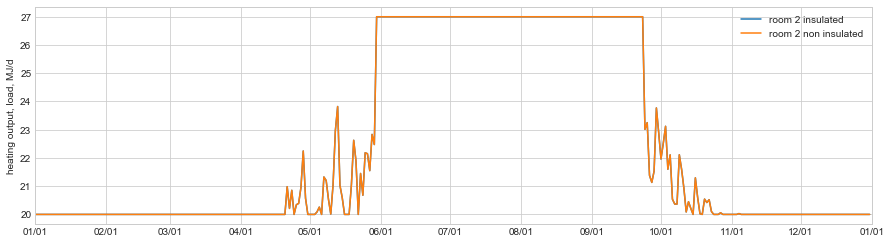

In [3]:
data = [
    (ac.get_main_value(6)['time_value']['duct_ambient_temperature_room2'], 'room 2 insulated'),
    (ac.get_main_value(52)['time_value']['duct_ambient_temperature_room2'], 'room 2 non insulated'),
]

ac.draw_graph('heating output, load, MJ/d', data, op='ave')

#### room 3

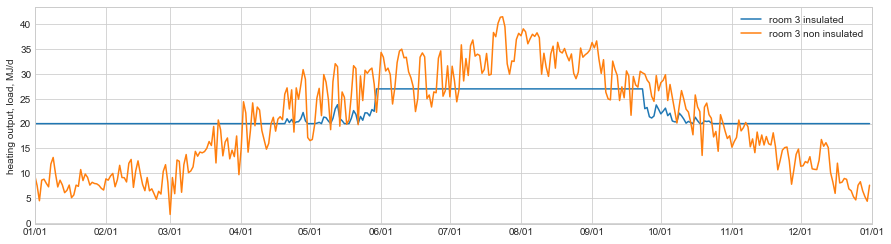

In [4]:
data = [
    (ac.get_main_value(6)['time_value']['duct_ambient_temperature_room3'], 'room 3 insulated'),
    (ac.get_main_value(52)['time_value']['duct_ambient_temperature_room3'], 'room 3 non insulated'),
]

ac.draw_graph('heating output, load, MJ/d', data, op='ave')

#### room 4

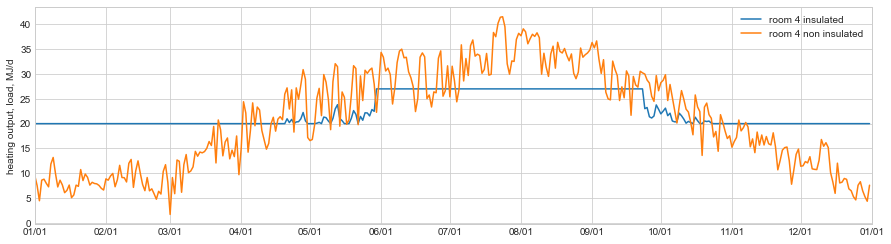

In [5]:
data = [
    (ac.get_main_value(6)['time_value']['duct_ambient_temperature_room4'], 'room 4 insulated'),
    (ac.get_main_value(52)['time_value']['duct_ambient_temperature_room4'], 'room 4 non insulated'),
]

ac.draw_graph('heating output, load, MJ/d', data, op='ave')

#### room 5

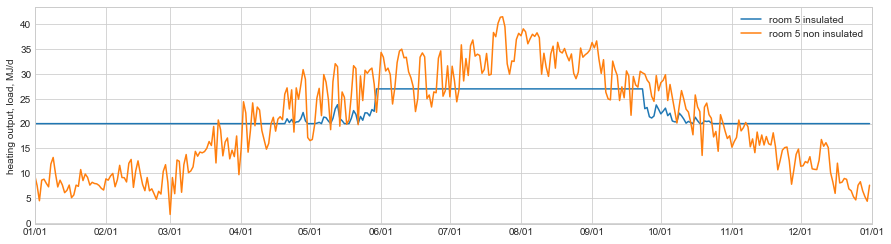

In [6]:
data = [
    (ac.get_main_value(6)['time_value']['duct_ambient_temperature_room5'], 'room 5 insulated'),
    (ac.get_main_value(52)['time_value']['duct_ambient_temperature_room5'], 'room 5 non insulated'),
]

ac.draw_graph('heating output, load, MJ/d', data, op='ave')

# ダクト損失

## 定式化

$$Q = \psi l \Delta T_{LMTD} 3600 \times 10^{-6}$$

$Q$: ダクトにおける熱損失, MJ/h  
$\psi$: ダクトの線熱損失係数, W/mK  
$l$: ダクトの長さ, m  
$\Delta T_{LMTD}$: ダクトの対数平均温度差, K  

$$ \Delta T_{LMTD} = \frac{ \theta_{up} - \theta_{down} } { \ln \frac{ \theta_{up} - \theta_{sur} }{ \theta_{down} - \theta_{sur} } } $$

$\theta_{up}$: ダクト上流側空気温度, ℃  
$\theta_{down}$: ダクト下流側空気温度, ℃  
$\theta_{sur}$: ダクト周囲空気温度, ℃  

$$Q = \left( \theta_{up} - \theta_{down} \right) c \rho V 10^{-6}$$

$c$: 空気の比熱, J/kg K  
$\rho$: 空気の密度, kg/m<sup>3</sup>  
$V$: 吹き出し風量, m<sup>3</sup>/h

$$L = \left( \theta_{down} - \theta_{ac} \right) c \rho V 10^{-6}$$

$L$: 負荷, MJ/h （正:暖房、負:冷房）  
$\theta_{ac}$: 居室の温度, ℃

これまでの式を連立させると、以下の式が得られる。

$$ \frac{ \psi l \times 3600 }{ c \rho V } = \ln \frac{ \theta_{up} - \theta_{sur} }{ \frac{L \times 10^6}{c \rho V} + \theta_{ac} - \theta_{sur} } $$

ここで未知数は、$\theta_{up}$・$L$・$V$であり、どれか2つが定まると残り1つの未知数が定まり、それに応じて熱損失も計算できる。

## ダクト上流側空気温度が未知数の場合

$$ \theta_{up} = \theta_{sur} + \left( \frac{L \times 10^6}{c \rho V} + \theta_{ac} - \theta_{sur} \right) \exp \frac{ \psi l \times 3600 }{ c \rho V } $$

#### ダクト周囲温度 50℃・室内設定温度 20℃

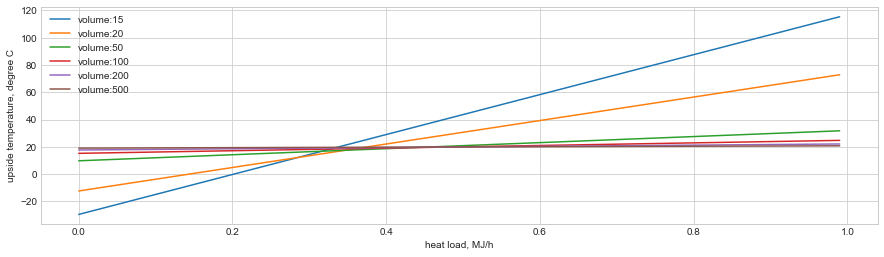

In [7]:
xs = np.arange(start=0.0, stop=1.0, step=0.01)

vs = [15, 20, 50, 100, 200, 500]
ys = [np.vectorize(cs.get_upside_temperature_from_load)(t_sur=50.0, load=xs, v=v, t_ac=20.0, psi=0.49, length=10) for v in vs]

fig = plt.figure(figsize=(15,4))
ax = fig.subplots()
for (y, v) in zip(ys, vs):
    ax.plot(xs, y, label='volume:'+ str(v))
ax.set_xlabel('heat load, MJ/h')
ax.set_ylabel('upside temperature, degree C')
plt.legend()
plt.show()

#### ダクト周囲温度 20℃・室内設定温度 28℃

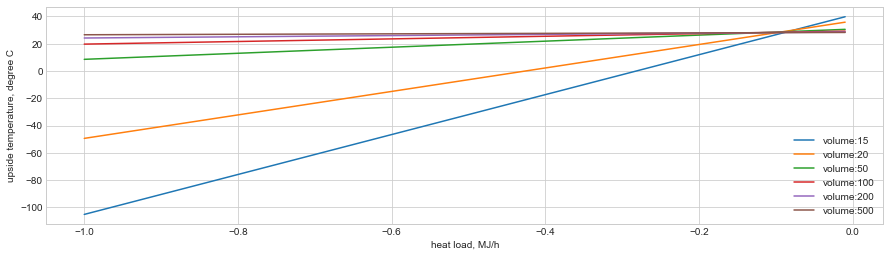

In [8]:
xs = np.arange(start=-1.0, stop=0.0, step=0.01)

vs = [15, 20, 50, 100, 200, 500]
ys = [np.vectorize(cs.get_upside_temperature_from_load)(t_sur=20.0, load=xs, v=v, t_ac=28.0, psi=0.49, length=10) for v in vs]

fig = plt.figure(figsize=(15,4))
ax = fig.subplots()
for (y, v) in zip(ys, vs):
    ax.plot(xs, y, label='volume:'+ str(v))
ax.set_xlabel('heat load, MJ/h')
ax.set_ylabel('upside temperature, degree C')
plt.legend()
plt.show()

$$Q = \left( \frac{L \times 10^6}{c \rho V} + \theta_{ac} - \theta_{sur} \right) \left( \exp \frac{ \psi l \times 3600 }{ c \rho V } - 1 \right) c \rho V 10^{-6}$$

$$ \theta_{down} = \frac{L \times 10^6}{c \rho V} + \theta_{ac} $$

## 負荷が未知数の場合

$$ L = \left( \theta_{sur} - \theta_{ac} + \left( \theta_{up} - \theta_{sur} \right) \exp \left( - \frac{ \psi l \times 3600 }{ c \rho V } \right) \right) c \rho V \times 10^{-6} $$

$$Q = \left( \theta_{up} - \theta_{sur} \right) \left( 1 - \exp \left( - \frac{ \psi l \times 3600 }{ c \rho V } \right) \right) c \rho V 10^{-6}$$

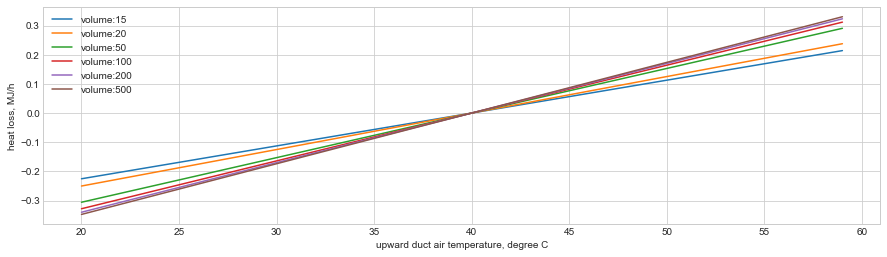

In [9]:
xs = np.arange(start=20.0, stop=60.0, step=1.0)

vs = [15, 20, 50, 100, 200, 500]
ys = [np.vectorize(cs.get_duct_heat_loss_from_upside_temperature)(t_sur=40.0, t_up=xs, v=v, psi=0.49, length=10) for v in vs]

fig = plt.figure(figsize=(15,4))
ax = fig.subplots()
for (y,v) in zip(ys, vs):
    ax.plot(xs, y, label='volume:'+ str(v))
ax.set_xlabel('upward duct air temperature, degree C')
ax.set_ylabel('heat loss, MJ/h')
plt.legend()
plt.show()

$$ \theta_{down} = \theta_{sur} + \left( \theta_{up} - \theta_{sur} \right) \exp \left( - \frac{ \psi l \times 3600 }{ c \rho V } \right) $$

## expornantial の値の変化 1

$$ \exp \left( \frac{ \psi l \times 3600 }{ c \rho V } \right) $$

In [10]:
def exp_value(psi, length, c, rho, v):
    if c * rho * v == 0.0:
        return 0.0
    else:
        return np.exp(psi * length * 3600 / (c * rho * v))

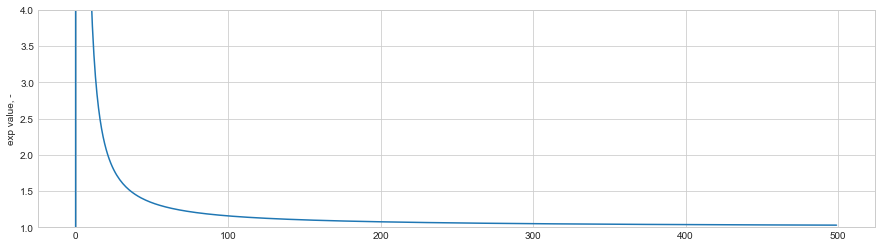

In [11]:
xs = np.arange(500.0)
ys = np.vectorize(exp_value)(psi=0.49, length=10.0, c=1006, rho=1.2, v=xs)
fig = plt.figure(figsize=(15,4))
ax = fig.subplots()
ax.plot(xs, ys)
ax.set_ylabel('exp value, -')
ax.set_ylim(bottom=1.0, top=4.0)
plt.show()

$$ \exp \left( - \frac{ \psi l \times 3600 }{ c \rho V } \right) $$

In [12]:
def exp_value(psi, length, c, rho, v):
    if c * rho * v == 0.0:
        return 0.0
    else:
        return np.exp( - psi * length * 3600 / (c * rho * v))

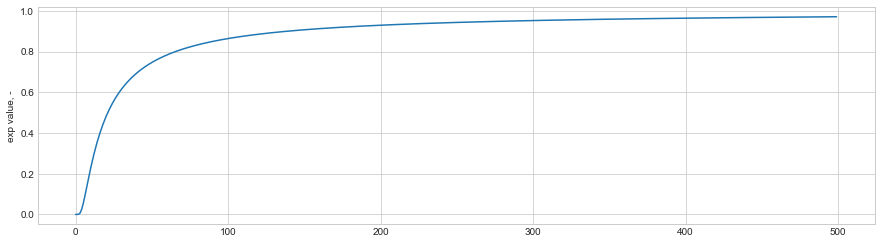

In [13]:
xs = np.arange(500.0)
ys = np.vectorize(exp_value)(psi=0.49, length=10.0, c=1006, rho=1.2, v=xs)
fig = plt.figure(figsize=(15,4))
ax = fig.subplots()
ax.plot(xs, ys)
ax.set_ylabel('exp value, -')
plt.show()